In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import mstats
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb

## ÉTAPE 1 : Chargement & Exploration initiale des données

In [51]:
df = pd.read_excel("avito_scraped_cars.xlsx")
df=pd.DataFrame(df)

In [52]:
df.head()

,id,list_id,title,description,price,old_price,location,ad_type,category,phone,...,alloy_wheels,speed_limiter,onboard_computer,rear_radar,cruise_control,leather_seats,navigation,sunroof,central_locking,electric_windows
0,75444387,56191250,meilleur Location de voiture,meilleur Location de voiture avec meilleurs prix,450.0,NaN,Casablanca,à louer,Voitures de location,661412363.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75007294,55835159,Mercedes-Benz Classe CLA Diesel Automatique 2025,mercedes CLA 220 DIESEL voiture toute option p...,NaN,NaN,Rabat,à vendre,Voitures d'occasion,666187046.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,75008804,55842308,Location de clio 5 a Casablanca,Location de voiture a Casablanca a bas prix et...,NaN,NaN,Casablanca,à louer,Voitures de location,661985172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75020424,55845764,KIFAL - VOLKSWAGEN Touareg,Référence Kifal : #VEH0000VMI\nKIFAL AUTO s'oc...,365000.0,NaN,Casablanca,à vendre,Voitures d'occasion,703117060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75381400,56140161,opel corsa,•avito / moteur.ma vous proposer :\n\n•opel - ...,198000.0,NaN,Casablanca,à vendre,Voitures d'occasion,777432421.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df.shape

(20747, 42)

In [54]:
df.columns

Index(['id', 'list_id', 'title', 'description', 'price', 'old_price',
       'location', 'ad_type', 'category', 'phone', 'seller_name',
       'seller_type', 'seller_verified', 'type', 'sector', 'mileage', 'brand',
       'model', 'doors', 'origin', 'first_owner', 'fiscal_power', 'condition',
       'year', 'gearbox', 'fuel_type', 'abs', 'airbags', 'audio_system',
       'rear_camera', 'ac', 'esp', 'alloy_wheels', 'speed_limiter',
       'onboard_computer', 'rear_radar', 'cruise_control', 'leather_seats',
       'navigation', 'sunroof', 'central_locking', 'electric_windows'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20747 entries, 0 to 20746
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20747 non-null  int64  
 1   list_id           20747 non-null  int64  
 2   title             20747 non-null  object 
 3   description       20746 non-null  object 
 4   price             16079 non-null  float64
 5   old_price         0 non-null      float64
 6   location          20747 non-null  object 
 7   ad_type           20747 non-null  object 
 8   category          20747 non-null  object 
 9   phone             18835 non-null  float64
 10  seller_name       20747 non-null  object 
 11  seller_type       20747 non-null  object 
 12  seller_verified   20747 non-null  bool   
 13  type              19213 non-null  object 
 14  sector            361 non-null    object 
 15  mileage           16575 non-null  object 
 16  brand             16575 non-null  object

In [56]:
df.describe()

,id,list_id,price,old_price,phone,doors,abs,airbags,audio_system,rear_camera,...,alloy_wheels,speed_limiter,onboard_computer,rear_radar,cruise_control,leather_seats,navigation,sunroof,central_locking,electric_windows
count,2.074700e+04,2.074700e+04,1.607900e+04,0.0,1.883500e+04,14593.000000,9337.000000,10376.000000,9439.000000,6359.000000,...,9202.000000,8233.000000,7652.000000,8025.000000,8311.000000,4850.000000,6513.000000,2955.000000,9805.000000,10580.000000
mean,7.477493e+07,5.568910e+07,2.172028e+05,NaN,6.684833e+08,4.892962,0.997858,0.996916,0.994597,0.973109,...,0.992719,0.993441,0.992551,0.985545,0.991216,0.952371,0.980961,0.891709,0.996940,0.997164
std,1.897024e+06,1.295442e+06,9.014157e+05,NaN,4.301822e+07,0.450147,0.046235,0.055451,0.073311,0.161778,...,0.085022,0.080726,0.085991,0.119364,0.093314,0.213002,0.136672,0.310800,0.055232,0.053177
min,2.844187e+07,2.255146e+07,1.000000e+00,NaN,5.204951e+08,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.468815e+07,5.558611e+07,5.500000e+04,NaN,6.455551e+08,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,7.505973e+07,5.587838e+07,1.180000e+05,NaN,6.625272e+08,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,7.538108e+07,5.614012e+07,1.880000e+05,NaN,6.819112e+08,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,7.559184e+07,5.631256e+07,5.800000e+07,NaN,8.086852e+08,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## ÉTAPE 2 :  Nettoyage et transformation initiale des données brutes

In [57]:
# 1_nombre des valeurs null dans les données
print("afficher juste les valeurs manquantes dans dataFrame")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

afficher juste les valeurs manquantes dans dataFrame
description             1
price                4668
old_price           20747
phone                1912
type                 1534
sector              20386
mileage              4172
brand                4172
model                4172
doors                6154
origin               6183
first_owner          6525
fiscal_power         4195
condition            4883
year                 4149
gearbox              4195
fuel_type            4161
abs                 11410
airbags             10371
audio_system        11308
rear_camera         14388
ac                   9826
esp                 13606
alloy_wheels        11545
speed_limiter       12514
onboard_computer    13095
rear_radar          12722
cruise_control      12436
leather_seats       15897
navigation          14234
sunroof             17792
central_locking     10942
electric_windows    10167
dtype: int64


In [58]:
# 2_Supprimer les colonnes avec trop de valeurs manquantes
threshold = len(df) * 0.7
df= df.dropna(thresh=threshold, axis=1)
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])
df.shape

description        1
price           4668
phone           1912
type            1534
mileage         4172
brand           4172
model           4172
doors           6154
origin          6183
fiscal_power    4195
condition       4883
year            4149
gearbox         4195
fuel_type       4161
dtype: int64


(20747, 23)

In [59]:
# 3_supprision des attributs n'est pas importance
df.drop(columns=['id', 'list_id','phone','description','seller_name','seller_verified','title'], inplace=True)
df.head()

,price,location,ad_type,category,seller_type,type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,450.0,Casablanca,à louer,Voitures de location,shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Rabat,à vendre,Voitures d'occasion,shop,"Voitures d'occasion, à vendre",0 - 4 999,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8 CV,Excellent,2025,Automatique,Diesel
2,NaN,Casablanca,à louer,Voitures de location,shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,365000.0,Casablanca,à vendre,Voitures d'occasion,shop,"Voitures d'occasion, à vendre",140 000 - 149 999,Volkswagen,Touareg,NaN,NaN,12 CV,NaN,2021,Automatique,Diesel
4,198000.0,Casablanca,à vendre,Voitures d'occasion,shop,"Voitures d'occasion, à vendre",0 - 4 999,Opel,Corsa,5.0,WW au Maroc,6 CV,Excellent,2024,Manuelle,Diesel


In [60]:
nombre_doublons = df.duplicated().sum()
print(nombre_doublons)
df = df.drop_duplicates()
nombre_doublons2 = df.duplicated().sum()
print(nombre_doublons2)

1974
0


In [61]:
# 4_ garder uniquement les voix à vendre
df = df[df['ad_type'] == 'à vendre']
df.drop(columns=['ad_type'], inplace=True)
df.head()

,price,location,category,seller_type,type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
1,NaN,Rabat,Voitures d'occasion,shop,"Voitures d'occasion, à vendre",0 - 4 999,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8 CV,Excellent,2025,Automatique,Diesel
3,365000.0,Casablanca,Voitures d'occasion,shop,"Voitures d'occasion, à vendre",140 000 - 149 999,Volkswagen,Touareg,NaN,NaN,12 CV,NaN,2021,Automatique,Diesel
4,198000.0,Casablanca,Voitures d'occasion,shop,"Voitures d'occasion, à vendre",0 - 4 999,Opel,Corsa,5.0,WW au Maroc,6 CV,Excellent,2024,Manuelle,Diesel
5,79000.0,Casablanca,Voitures d'occasion,shop,"Voitures d'occasion, à vendre",170 000 - 179 999,Renault,Megane,3.0,WW au Maroc,7 CV,Bon,2009,Manuelle,Diesel
6,93000.0,Casablanca,Voitures d'occasion,shop,"Voitures d'occasion, à vendre",75 000 - 79 999,Fiat,500,5.0,WW au Maroc,6 CV,Très bon,2017,Manuelle,Diesel


In [62]:
# 5_garder just les lignes de vendre des voitures 

In [63]:
# print(df['category'].unique())
# print()
# print(df['type'].unique())

In [64]:
# result = df[df['category'] == 'Autre Immobilier']
# print(result)

In [65]:
# min_non_nan = int(df.shape[1] * 0.2)
# df = df.dropna(thresh=min_non_nan)
# df.shape

In [66]:
# print(df['category'].unique())

In [67]:
# result = df[df['category'] == 'Appartements']
# print(result)

In [68]:
colonnes_a_verifier = ['brand', 'model', 'doors', 'origin', 'fiscal_power', 'condition', 'year', 'gearbox', 'fuel_type', 'mileage']
#tester avce la supprission de year et origin 
mask_all_nan = df[colonnes_a_verifier].isna().all(axis=1)
df = df[~mask_all_nan].copy()
print(df['category'].unique())
print()
print(df['type'].unique())
df.shape

["Voitures d'occasion" 'Motos']

["Voitures d'occasion, à vendre" 'Motos, à vendre']


(15971, 15)

In [69]:
result = df[df['category'] == 'Motos']
print(result)

          price    location category seller_type             type mileage  \
2531    45000.0   Marrakech    Motos     private  Motos, à vendre     NaN   
2727    54999.0  Casablanca    Motos     private  Motos, à vendre     NaN   
3036        NaN      Temara    Motos     private  Motos, à vendre     NaN   
3551        NaN         Fès    Motos        shop  Motos, à vendre     NaN   
4968    70000.0      Temara    Motos     private  Motos, à vendre     NaN   
7645   135000.0       Rabat    Motos     private  Motos, à vendre     NaN   
8662   285000.0  Casablanca    Motos        shop  Motos, à vendre     NaN   
11405   52000.0  Casablanca    Motos     private  Motos, à vendre     NaN   
11628       NaN      Meknès    Motos     private  Motos, à vendre     NaN   
12077  235000.0    Bouznika    Motos     private  Motos, à vendre     NaN   
12342  255000.0  Casablanca    Motos        shop  Motos, à vendre     NaN   
13032  110000.0   Marrakech    Motos     private  Motos, à vendre     NaN   

In [70]:
df = df[df['category'] != 'Motos'].reset_index(drop=True)
print(df['category'].unique())
print(df['type'].unique())
df.shape

["Voitures d'occasion"]
["Voitures d'occasion, à vendre"]


(15955, 15)

In [71]:
# 6_aprés fair l'analyse sur les attributs category et type on a pas besoin de cette attributs 
df.drop(columns=['category','type'], inplace=True)
df.head()

,price,location,seller_type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,NaN,Rabat,shop,0 - 4 999,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8 CV,Excellent,2025,Automatique,Diesel
1,365000.0,Casablanca,shop,140 000 - 149 999,Volkswagen,Touareg,NaN,NaN,12 CV,NaN,2021,Automatique,Diesel
2,198000.0,Casablanca,shop,0 - 4 999,Opel,Corsa,5.0,WW au Maroc,6 CV,Excellent,2024,Manuelle,Diesel
3,79000.0,Casablanca,shop,170 000 - 179 999,Renault,Megane,3.0,WW au Maroc,7 CV,Bon,2009,Manuelle,Diesel
4,93000.0,Casablanca,shop,75 000 - 79 999,Fiat,500,5.0,WW au Maroc,6 CV,Très bon,2017,Manuelle,Diesel


In [72]:
# 7_gestion de probléme des plages dans l'attribut mileage
def convert_range_to_number(s):
    if pd.isna(s):
        return np.nan
    s = s.replace(' ', '')
    if '-' in s:
        parts = s.split('-')
        try:
            low = int(parts[0])
            high = int(parts[1])
            return (low + high) / 2
        except:
            return np.nan
    else:
        try:
            return int(s)
        except:
            return np.nan
df['mileage'] = df['mileage'].apply(convert_range_to_number)
df.head()

,price,location,seller_type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,NaN,Rabat,shop,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8 CV,Excellent,2025,Automatique,Diesel
1,365000.0,Casablanca,shop,144999.5,Volkswagen,Touareg,NaN,NaN,12 CV,NaN,2021,Automatique,Diesel
2,198000.0,Casablanca,shop,2499.5,Opel,Corsa,5.0,WW au Maroc,6 CV,Excellent,2024,Manuelle,Diesel
3,79000.0,Casablanca,shop,174999.5,Renault,Megane,3.0,WW au Maroc,7 CV,Bon,2009,Manuelle,Diesel
4,93000.0,Casablanca,shop,77499.5,Fiat,500,5.0,WW au Maroc,6 CV,Très bon,2017,Manuelle,Diesel


In [73]:
# 8_gestion de probléme d'attribut fiscal_power 
def safe_extract(val):
    numbers = re.findall(r'\d+', str(val))
    return int(numbers[0]) if numbers else None

df['fiscal_power'] = df['fiscal_power'].apply(safe_extract)
df.head()

,price,location,seller_type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,NaN,Rabat,shop,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8.0,Excellent,2025,Automatique,Diesel
1,365000.0,Casablanca,shop,144999.5,Volkswagen,Touareg,NaN,NaN,12.0,NaN,2021,Automatique,Diesel
2,198000.0,Casablanca,shop,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,Excellent,2024,Manuelle,Diesel
3,79000.0,Casablanca,shop,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,Bon,2009,Manuelle,Diesel
4,93000.0,Casablanca,shop,77499.5,Fiat,500,5.0,WW au Maroc,6.0,Très bon,2017,Manuelle,Diesel


In [74]:
# 9_convertire les champs cartéristique 
cols_to_lower = ["fuel_type", "gearbox", "condition", "seller_type", "location"]
df[cols_to_lower] = df[cols_to_lower].map(lambda x: str(x).lower() if pd.notnull(x) else x)
for col in cols_to_lower:
    df[col] = df[col].astype(str).str.strip()
df.head()

,price,location,seller_type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,NaN,rabat,shop,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8.0,excellent,2025,automatique,diesel
1,365000.0,casablanca,shop,144999.5,Volkswagen,Touareg,NaN,NaN,12.0,nan,2021,automatique,diesel
2,198000.0,casablanca,shop,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,excellent,2024,manuelle,diesel
3,79000.0,casablanca,shop,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,bon,2009,manuelle,diesel
4,93000.0,casablanca,shop,77499.5,Fiat,500,5.0,WW au Maroc,6.0,très bon,2017,manuelle,diesel


## ÉTAPE 3 : Gestion des données catégorielles

In [75]:
# 1_afficher les valers manquants dans dataFrame pour traité les varibales caté
print(df.isnull().sum())

price           3607
location           0
seller_type        0
mileage           64
brand             11
model             11
doors           1943
origin          1980
fiscal_power      34
condition          0
year               4
gearbox            0
fuel_type          0
dtype: int64


In [76]:
# 2_enodage de champs seller_type et gearbox 
#faire le mapping dans fichier json
df['seller_type'] = df['seller_type'].map({'private': 0, 'shop': 1})
df.head()

,price,location,seller_type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,NaN,rabat,1,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8.0,excellent,2025,automatique,diesel
1,365000.0,casablanca,1,144999.5,Volkswagen,Touareg,NaN,NaN,12.0,nan,2021,automatique,diesel
2,198000.0,casablanca,1,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,excellent,2024,manuelle,diesel
3,79000.0,casablanca,1,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,bon,2009,manuelle,diesel
4,93000.0,casablanca,1,77499.5,Fiat,500,5.0,WW au Maroc,6.0,très bon,2017,manuelle,diesel


In [77]:
# 3_encodage ordinal d'attribut condition 
frequences = df['condition'].value_counts()
print(frequences)

condition
excellent      7340
très bon       5537
bon            1606
nan             716
neuf            573
correct         164
pour pièces      11
endommagé         8
Name: count, dtype: int64


In [78]:
ordre_condition = {
    'pour pièces': 0,
    'endommagé': 1,
    'correct': 2,
    'bon': 3,
    'très bon': 4,
    'excellent': 5,
    'neuf': 6,
}
df['condition'] = df['condition'].map(ordre_condition)
df.head()

,price,location,seller_type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type
0,NaN,rabat,1,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8.0,5.0,2025,automatique,diesel
1,365000.0,casablanca,1,144999.5,Volkswagen,Touareg,NaN,NaN,12.0,NaN,2021,automatique,diesel
2,198000.0,casablanca,1,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,5.0,2024,manuelle,diesel
3,79000.0,casablanca,1,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,3.0,2009,manuelle,diesel
4,93000.0,casablanca,1,77499.5,Fiat,500,5.0,WW au Maroc,6.0,4.0,2017,manuelle,diesel


In [79]:
# 4_encodage de gearbox
frequences = df['condition'].value_counts()
print(frequences)

condition
5.0    7340
4.0    5537
3.0    1606
6.0     573
2.0     164
0.0      11
1.0       8
Name: count, dtype: int64


In [80]:
frequences = df['gearbox'].value_counts()
print(frequences)

gearbox
manuelle       9585
automatique    6336
nan              34
Name: count, dtype: int64


In [81]:
df['gearbox'] = df['gearbox'].map({'manuelle': 0, 'automatique': 1})
frequences = df['gearbox'].value_counts()
print(frequences)

gearbox
0.0    9585
1.0    6336
Name: count, dtype: int64


In [82]:
# 5_encodage de champs fuel_type
frequences = df['fuel_type'].value_counts()
print(frequences)

fuel_type
diesel        13048
essence        2617
hybride         218
electrique       59
lpg              13
Name: count, dtype: int64


In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['fuel_type_encoded'] = le.fit_transform(df['fuel_type'])
df.drop('fuel_type', axis=1, inplace=True)


In [84]:
# 6_encodage de champs location 
nombre_villes = df['location'].nunique() 
print("Nombre de villes uniques :" ,nombre_villes)

Nombre de villes uniques : 195


In [85]:
ville_region = {
    'rabat': 'Rabat-Salé-Kénitra',
    'الرباط': 'Rabat-Salé-Kénitra',
    'casablanca': 'Casablanca-Settat',
    'الدار البيضاء': 'Casablanca-Settat',
    'kénitra': 'Rabat-Salé-Kénitra',
    'fès': 'Fès-Meknès',
    'béni mellal': 'Béni Mellal-Khénifra',
    'salé': 'Rabat-Salé-Kénitra',
    'tanger': 'Tanger-Tétouan-Al Hoceima',
    'agadir': 'Souss-Massa',
    'nador': "L'Oriental",
    'berrechid': 'Casablanca-Settat',
    'marrakech': 'Marrakech-Safi',
    'مراكش': 'Marrakech-Safi',
    'mohammedia': 'Casablanca-Settat',
    'ain aouda': 'Rabat-Salé-Kénitra',
    'souk sebt ouled nemma': 'Béni Mellal-Khénifra',
    'settat': 'Casablanca-Settat',
    'oujda': "L'Oriental",
    'temara': 'Rabat-Salé-Kénitra',
    'el jadida': 'Casablanca-Settat',
    'meknès': 'Fès-Meknès',
    'tétouan': 'Tanger-Tétouan-Al Hoceima',
    'fnideq': 'Tanger-Tétouan-Al Hoceima',
    'bouskoura': 'Casablanca-Settat',
    'safi': 'Marrakech-Safi',
    'sidi slimane': 'Rabat-Salé-Kénitra',
    'larache': 'Tanger-Tétouan-Al Hoceima',
    'bouznika': 'Rabat-Salé-Kénitra',
    'dar bouazza': 'Casablanca-Settat',
    'ouad eddahab': 'Dakhla-Oued Ed-Dahab',
    'essaouira': 'Marrakech-Safi',
    'taza': 'Fès-Meknès',
    'sefrou': 'Fès-Meknès',
    'boufkrane': 'Fès-Meknès',
    'chichaoua': 'Marrakech-Safi',
    'errachidia': 'Drâa-Tafilalet',
    'ain harrouda': 'Casablanca-Settat',
    'khouribga': 'Béni Mellal-Khénifra',
    'azrou': 'Fès-Meknès',
    'oued zem': 'Béni Mellal-Khénifra',
    'moulay bousselham': 'Rabat-Salé-Kénitra',
    'tiznit': 'Souss-Massa',
    'tafraout': 'Souss-Massa',
    'tata': 'Guelmim-Oued Noun',
    'tifelt': 'Rabat-Salé-Kénitra',
    'missour': 'Drâa-Tafilalet',
    'sidi kacem': 'Rabat-Salé-Kénitra',
    'deroua': 'Casablanca-Settat',
    'dakhla': 'Dakhla-Oued Ed-Dahab',
    'zagora': 'Drâa-Tafilalet',
    'had soualem': 'Casablanca-Settat',
    'tan-tan': 'Guelmim-Oued Noun',
    'laâyoune': 'Laâyoune-Sakia El Hamra',
    'saidia': "L'Oriental",
    'daoura': 'Casablanca-Settat',
    'أكادير': 'Souss-Massa',
    'khemisset': 'Rabat-Salé-Kénitra',
    'mechra bel ksiri': 'Rabat-Salé-Kénitra',
    'el mansouria': 'Rabat-Salé-Kénitra',
    'el kelâa des sraghna': 'Marrakech-Safi',
    'al hoceima': 'Tanger-Tétouan-Al Hoceima',
    'k': 'Fès-Meknès',
    'ain sbit': 'Casablanca-Settat',
    'el hajeb': 'Fès-Meknès',
    'fquih ben saleh': 'Béni Mellal-Khénifra',
    'skhirat': 'Rabat-Salé-Kénitra',
    'asilah': 'Tanger-Tétouan-Al Hoceima',
    'guelmim': 'Guelmim-Oued Noun',
    'ouarzazate': 'Drâa-Tafilalet',
    'guercif': "L'Oriental",
    'taroudant': 'Souss-Massa',
    'ifrane': 'Fès-Meknès',
    'laattaouia': 'Casablanca-Settat',
    'berkane': "L'Oriental",
    'midelt': 'Drâa-Tafilalet',
    'tamesna': 'Rabat-Salé-Kénitra',
    'chefchaouen': 'Tanger-Tétouan-Al Hoceima',
    'kasba tadla': 'Béni Mellal-Khénifra',
    'khénifra': 'Béni Mellal-Khénifra',
    'martil': 'Tanger-Tétouan-Al Hoceima',
    'ouled teïma': 'Souss-Massa',
    'taounate': 'Fès-Meknès',
    'benslimane': 'Casablanca-Settat',
    'mdiq': 'Tanger-Tétouan-Al Hoceima',
    'ouazzane': 'Tanger-Tétouan-Al Hoceima',
    'jorf': 'Béni Mellal-Khénifra',
    'outat el haj': 'Fès-Meknès',
    'ait melloul': 'Souss-Massa',
    'selouane': 'Tanger-Tétouan-Al Hoceima',
    'ait ourir': 'Marrakech-Safi',
    'belfaa': 'Fès-Meknès',
    'ain taoujdate': 'Fès-Meknès',
    'ben guerir': 'Marrakech-Safi',
    "mrir't": 'Fès-Meknès',
    'azilal': 'Béni Mellal-Khénifra',
    'agadir melloul': 'Souss-Massa',
    'sebt gzoula': 'Casablanca-Settat',
    'tit mellil': 'Casablanca-Settat',
    'youssoufia': 'Marrakech-Safi',
    'ain tizgha': 'Souss-Massa',
    'tinghir': 'Drâa-Tafilalet',
    'gzenaya al janoubia': 'Tanger-Tétouan-Al Hoceima',
    'ksar el-kebir': 'Tanger-Tétouan-Al Hoceima',
    'tamensourt': 'Casablanca-Settat',
    'inzegan': 'Souss-Massa',
    'sidi bennour': 'Casablanca-Settat',
    'sidi bou othmane': 'Casablanca-Settat',
    'biougra': 'Souss-Massa',
    'bejaad': 'Fès-Meknès',
    'souk el arbaa': 'Casablanca-Settat',
    'tahla': 'Fès-Meknès',
    'demnate': 'Marrakech-Safi',
    'bni tadjite': 'Fès-Meknès',
    'bouarfa': "L'Oriental",
    'ouled berhil': 'Marrakech-Safi',
    'azemmour': 'Casablanca-Settat',
    'driouch': "L'Oriental",
    'guigou': 'Fès-Meknès',
    'tarfaya': 'Laâyoune-Sakia El Hamra',
    'jorf el melha': 'Béni Mellal-Khénifra',
    'karia ba mohamed': 'Tanger-Tétouan-Al Hoceima',
    'errahma': 'Casablanca-Settat',
    'lahraouyine': 'Casablanca-Settat',
    'meknassa al gharbia': 'Casablanca-Settat',
    'zaouïat cheikh': 'Casablanca-Settat',
    'nouaceur': 'Casablanca-Settat',
    'houara oulad raho': 'Casablanca-Settat',
    'mediouna': 'Casablanca-Settat',
    'sidi rahal': 'Casablanca-Settat',
    'sidi allal el bahraoui': 'Rabat-Salé-Kénitra',
    'tnine aglou': 'Souss-Massa',
    'ahfir': "L'Oriental",
    'skhinate': "L'Oriental",
    'taourirt': "L'Oriental",
    'es-semara': 'Laâyoune-Sakia El Hamra',
    'dcheïra el jihadia': 'Souss-Massa',
    'echemmaia': 'Marrakech-Safi',
    'el ksiba': 'Béni Mellal-Khénifra',
    'agdz': 'Drâa-Tafilalet',
    'el menzeh': 'Casablanca-Settat',
    'lqliaa': 'Casablanca-Settat',
    'ouislane': 'Fès-Meknès',
    'sidi slimane echcharraa': 'Rabat-Salé-Kénitra',
    'goulmima': 'Drâa-Tafilalet',
    'tamaris': 'Casablanca-Settat',
    'imintanoute': 'Marrakech-Safi',
    'sidi yahya el gharb': 'Rabat-Salé-Kénitra',
    'imi ouaddar': 'Souss-Massa',
    'mkansa': 'Casablanca-Settat',
    'ait yaazem': 'Fès-Meknès',
    'boujniba': 'Béni Mellal-Khénifra',
    'figuig': "L'Oriental",
    'tikiouine': 'Souss-Massa',
    'bir jdid': 'Casablanca-Settat',
    'agourai': 'Marrakech-Safi',
    'bni ansar': "L'Oriental",
    'taghazout': 'Souss-Massa',
    'boujdour': 'Laâyoune-Sakia El Hamra',
    'zaouiat sidi kacem': 'Rabat-Salé-Kénitra',
    'assa': 'Guelmim-Oued Noun',
    'itzer': 'Tanger-Tétouan-Al Hoceima',
    'had kourt': 'Casablanca-Settat',
    'sidi ifni': 'Guelmim-Oued Noun',
    'mehdia': 'Casablanca-Settat',
    'sidi bouzid': 'Casablanca-Settat',
    'el menzel': 'Casablanca-Settat',
    'ain attig': 'Fès-Meknès',
    'khemisset chaouia': 'Rabat-Salé-Kénitra',
    'hassi berkane': "L'Oriental",
    'aknoul': 'Fès-Meknès',
    'imouzzer-kendar': 'Tanger-Tétouan-Al Hoceima',
    'mers el kheir': 'Tanger-Tétouan-Al Hoceima',
    'ben ahmed': 'Casablanca-Settat',
    'amizmiz': 'Marrakech-Safi',
    'béni yakhlef': 'Béni Mellal-Khénifra',
    'lakhoualqa': 'Béni Mellal-Khénifra',
    'sabaa aiyoun': 'Fès-Meknès',
    'laattaouia ech-chaybia': 'Casablanca-Settat',
    'boulemane': 'Fès-Meknès',
    'zemamra': 'Casablanca-Settat',
    'arfoud': 'Drâa-Tafilalet',
    'zaïo': "L'Oriental",
    'sidi bibi': 'Souss-Massa',
    'zenata': 'Casablanca-Settat',
    'oualidia': 'Casablanca-Settat',
    'ait amira': 'Souss-Massa',
    'dcheira': 'Souss-Massa',
    'al aaroui': "L'Oriental",
    'tendrara': "L'Oriental",
    'bouizakarne': 'Guelmim-Oued Noun',
    'boumalne-dadès': 'Drâa-Tafilalet',
    'naour': 'Casablanca-Settat',
    'sidi smail': 'Casablanca-Settat',
    'oued amlil': 'Fès-Meknès',
}
df['region'] = df['location'].map(ville_region)
nombre_reg = df['region'].nunique()
print("Nombre de villes uniques avant suppression :" ,nombre_reg)
df = df.drop('location', axis=1)
df.head()

Nombre de villes uniques avant suppression : 12


,price,seller_type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type_encoded,region
0,NaN,1,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8.0,5.0,2025,1.0,0,Rabat-Salé-Kénitra
1,365000.0,1,144999.5,Volkswagen,Touareg,NaN,NaN,12.0,NaN,2021,1.0,0,Casablanca-Settat
2,198000.0,1,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,5.0,2024,0.0,0,Casablanca-Settat
3,79000.0,1,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,3.0,2009,0.0,0,Casablanca-Settat
4,93000.0,1,77499.5,Fiat,500,5.0,WW au Maroc,6.0,4.0,2017,0.0,0,Casablanca-Settat


In [86]:
le = LabelEncoder()
df['region_encoded'] = le.fit_transform(df['region'])
df.drop('region', axis=1, inplace=True)
df.head()

,price,seller_type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type_encoded,region_encoded
0,NaN,1,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8.0,5.0,2025,1.0,0,9
1,365000.0,1,144999.5,Volkswagen,Touareg,NaN,NaN,12.0,NaN,2021,1.0,0,1
2,198000.0,1,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,5.0,2024,0.0,0,1
3,79000.0,1,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,3.0,2009,0.0,0,1
4,93000.0,1,77499.5,Fiat,500,5.0,WW au Maroc,6.0,4.0,2017,0.0,0,1


In [87]:
# 7_encodage de champs brand 
nombre_brands = df['brand'].nunique() 
print("Nombre de brand uniques :" ,nombre_brands)
## en va fair l'encodage des attributs origin , brand et model dans lentrainement pour eviter le probléme de data leakage et overfitting

Nombre de brand uniques : 72


## ÉTAPE 4 : Gestion des valeurs manquantes

In [88]:
# 1_affichage des valeurs manquents dans 
print(df.isnull().sum())
colonnes = ['gearbox', 'year', 'condition', 'fiscal_power', 'origin', 'doors', 'model', 'brand', 'mileage', 'price']
print(df[colonnes].dtypes)
df.head()

price                3607
seller_type             0
mileage                64
brand                  11
model                  11
doors                1943
origin               1980
fiscal_power           34
condition             716
year                    4
gearbox                34
fuel_type_encoded       0
region_encoded          0
dtype: int64
gearbox         float64
year             object
condition       float64
fiscal_power    float64
origin           object
doors           float64
model            object
brand            object
mileage         float64
price           float64
dtype: object


,price,seller_type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type_encoded,region_encoded
0,NaN,1,2499.5,Mercedes-Benz,Classe CLA,5.0,Importée neuve,8.0,5.0,2025,1.0,0,9
1,365000.0,1,144999.5,Volkswagen,Touareg,NaN,NaN,12.0,NaN,2021,1.0,0,1
2,198000.0,1,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,5.0,2024,0.0,0,1
3,79000.0,1,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,3.0,2009,0.0,0,1
4,93000.0,1,77499.5,Fiat,500,5.0,WW au Maroc,6.0,4.0,2017,0.0,0,1


In [89]:
# 2é_corriger le probleme de type de year 
# df['year'] = df['year'].astype(int)
# print(df[colonnes].dtypes)

In [90]:
print(df['year'].unique())

['2025' '2021' '2024' '2009' '2017' '2018' '2008' '2023' '2012' '2019'
 '2016' '2022' '2020' '2005' '2011' '2014' '2004' '2010' '2013' '2015'
 '2006' '1998' '2002' '1986' '2000' '2007' '1993' '1996' '1995' '1990'
 '1992' '1997' '1980 ou plus ancien' '1999' '1984' '2003' '2001' '1991'
 '1987' '1989' '1988' '1983' '1994' '1981' '1985' '1982' nan]


In [91]:
df['year'] = df['year'].replace("1980 ou plus ancien", 1980)
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')
print(df['year'].dtypes)

Int64


price                   0
seller_type             0
mileage                49
brand                   7
model                   7
doors                1392
origin               1501
fiscal_power           26
condition             561
year                    1
gearbox                22
fuel_type_encoded       0
region_encoded          0
dtype: int64
count    1.234800e+04
mean     1.684697e+05
std      3.696511e+05
min      6.900000e+03
25%      8.100000e+04
50%      1.300000e+05
75%      1.950000e+05
max      3.100000e+07
Name: price, dtype: float64


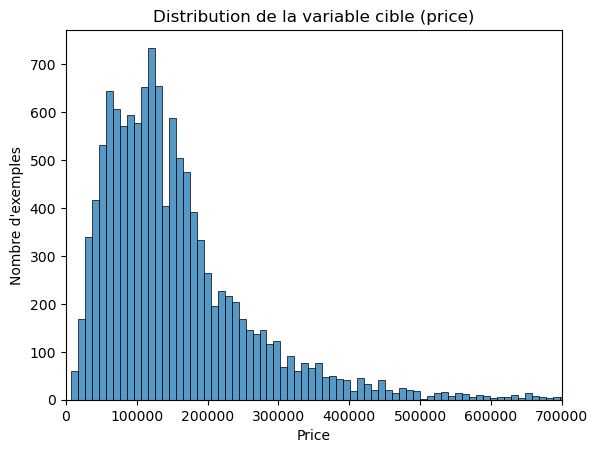

In [92]:
# 2_supprission la colonnes price qui va des valeurs NaN parce que cest la valeur cible en peut pas le remplacer 
df = df.dropna(subset=['price'])
print(df.isnull().sum())
df.shape
#pour resoudrer un probléme ecloncher dans le training 
print(df['price'].describe()) 
plt.xlim(0, 700_000)  # Limite l'axe X
sns.histplot(data=df, x='price')
plt.title('Distribution de la variable cible (price)')
plt.xlabel('Price')
plt.ylabel('Nombre d\'exemples')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [93]:
# 2_remplacement des NaN dans la colonne gearbox par lplus freq
most_frequent = df['gearbox'].mode()[0]
df['gearbox'] = df['gearbox'].fillna(most_frequent)
print(df.isnull().sum())

price                   0
seller_type             0
mileage                49
brand                   7
model                   7
doors                1392
origin               1501
fiscal_power           26
condition             561
year                    1
gearbox                 0
fuel_type_encoded       0
region_encoded          0
dtype: int64


In [94]:
# 3-remplacement de year
mean_year =  df['year'].mode()[0]
df['year'] = df['year'].fillna(mean_year)
print(df.isnull().sum())

price                   0
seller_type             0
mileage                49
brand                   7
model                   7
doors                1392
origin               1501
fiscal_power           26
condition             561
year                    0
gearbox                 0
fuel_type_encoded       0
region_encoded          0
dtype: int64


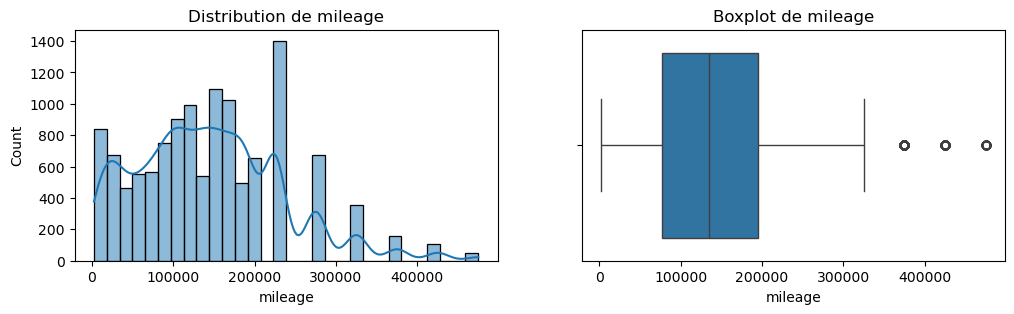

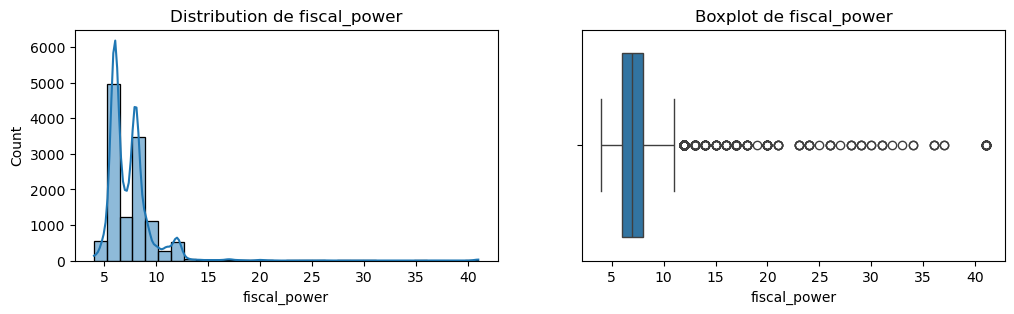

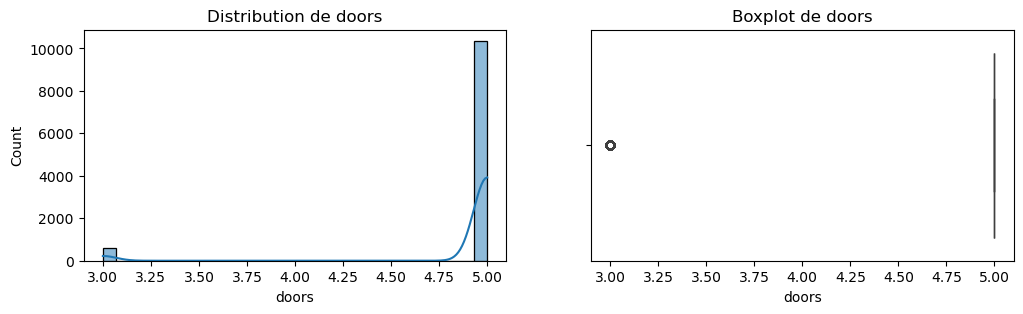

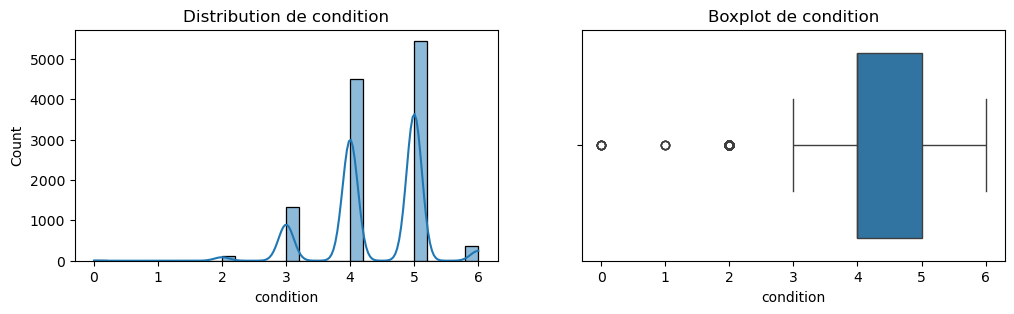

In [95]:
# 4_distrubition de mileage,fiscal_power,doors,condition
for col in ['mileage', 'fiscal_power', 'doors','condition']:
    plt.figure(figsize=(12,3))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution de {col}')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    
    plt.show()

In [96]:
for col in ['fiscal_power', 'doors', 'mileage','condition']:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)
print(df.isnull().sum())

price                   0
seller_type             0
mileage                 0
brand                   7
model                   7
doors                   0
origin               1501
fiscal_power            0
condition               0
year                    0
gearbox                 0
fuel_type_encoded       0
region_encoded          0
dtype: int64


In [97]:
# 5_rempplacement des nan dans colonnes brand,model,origin
# df['origin'] = df['origin'].fillna('unknown')
# df['brand'] = df['brand'].fillna('unknown')
# df['model'] = df['model'].fillna('unknown')
# print(df.isnull().sum())
# head_element(30)

## ÉTAPE 5 : Analyse de corrélation

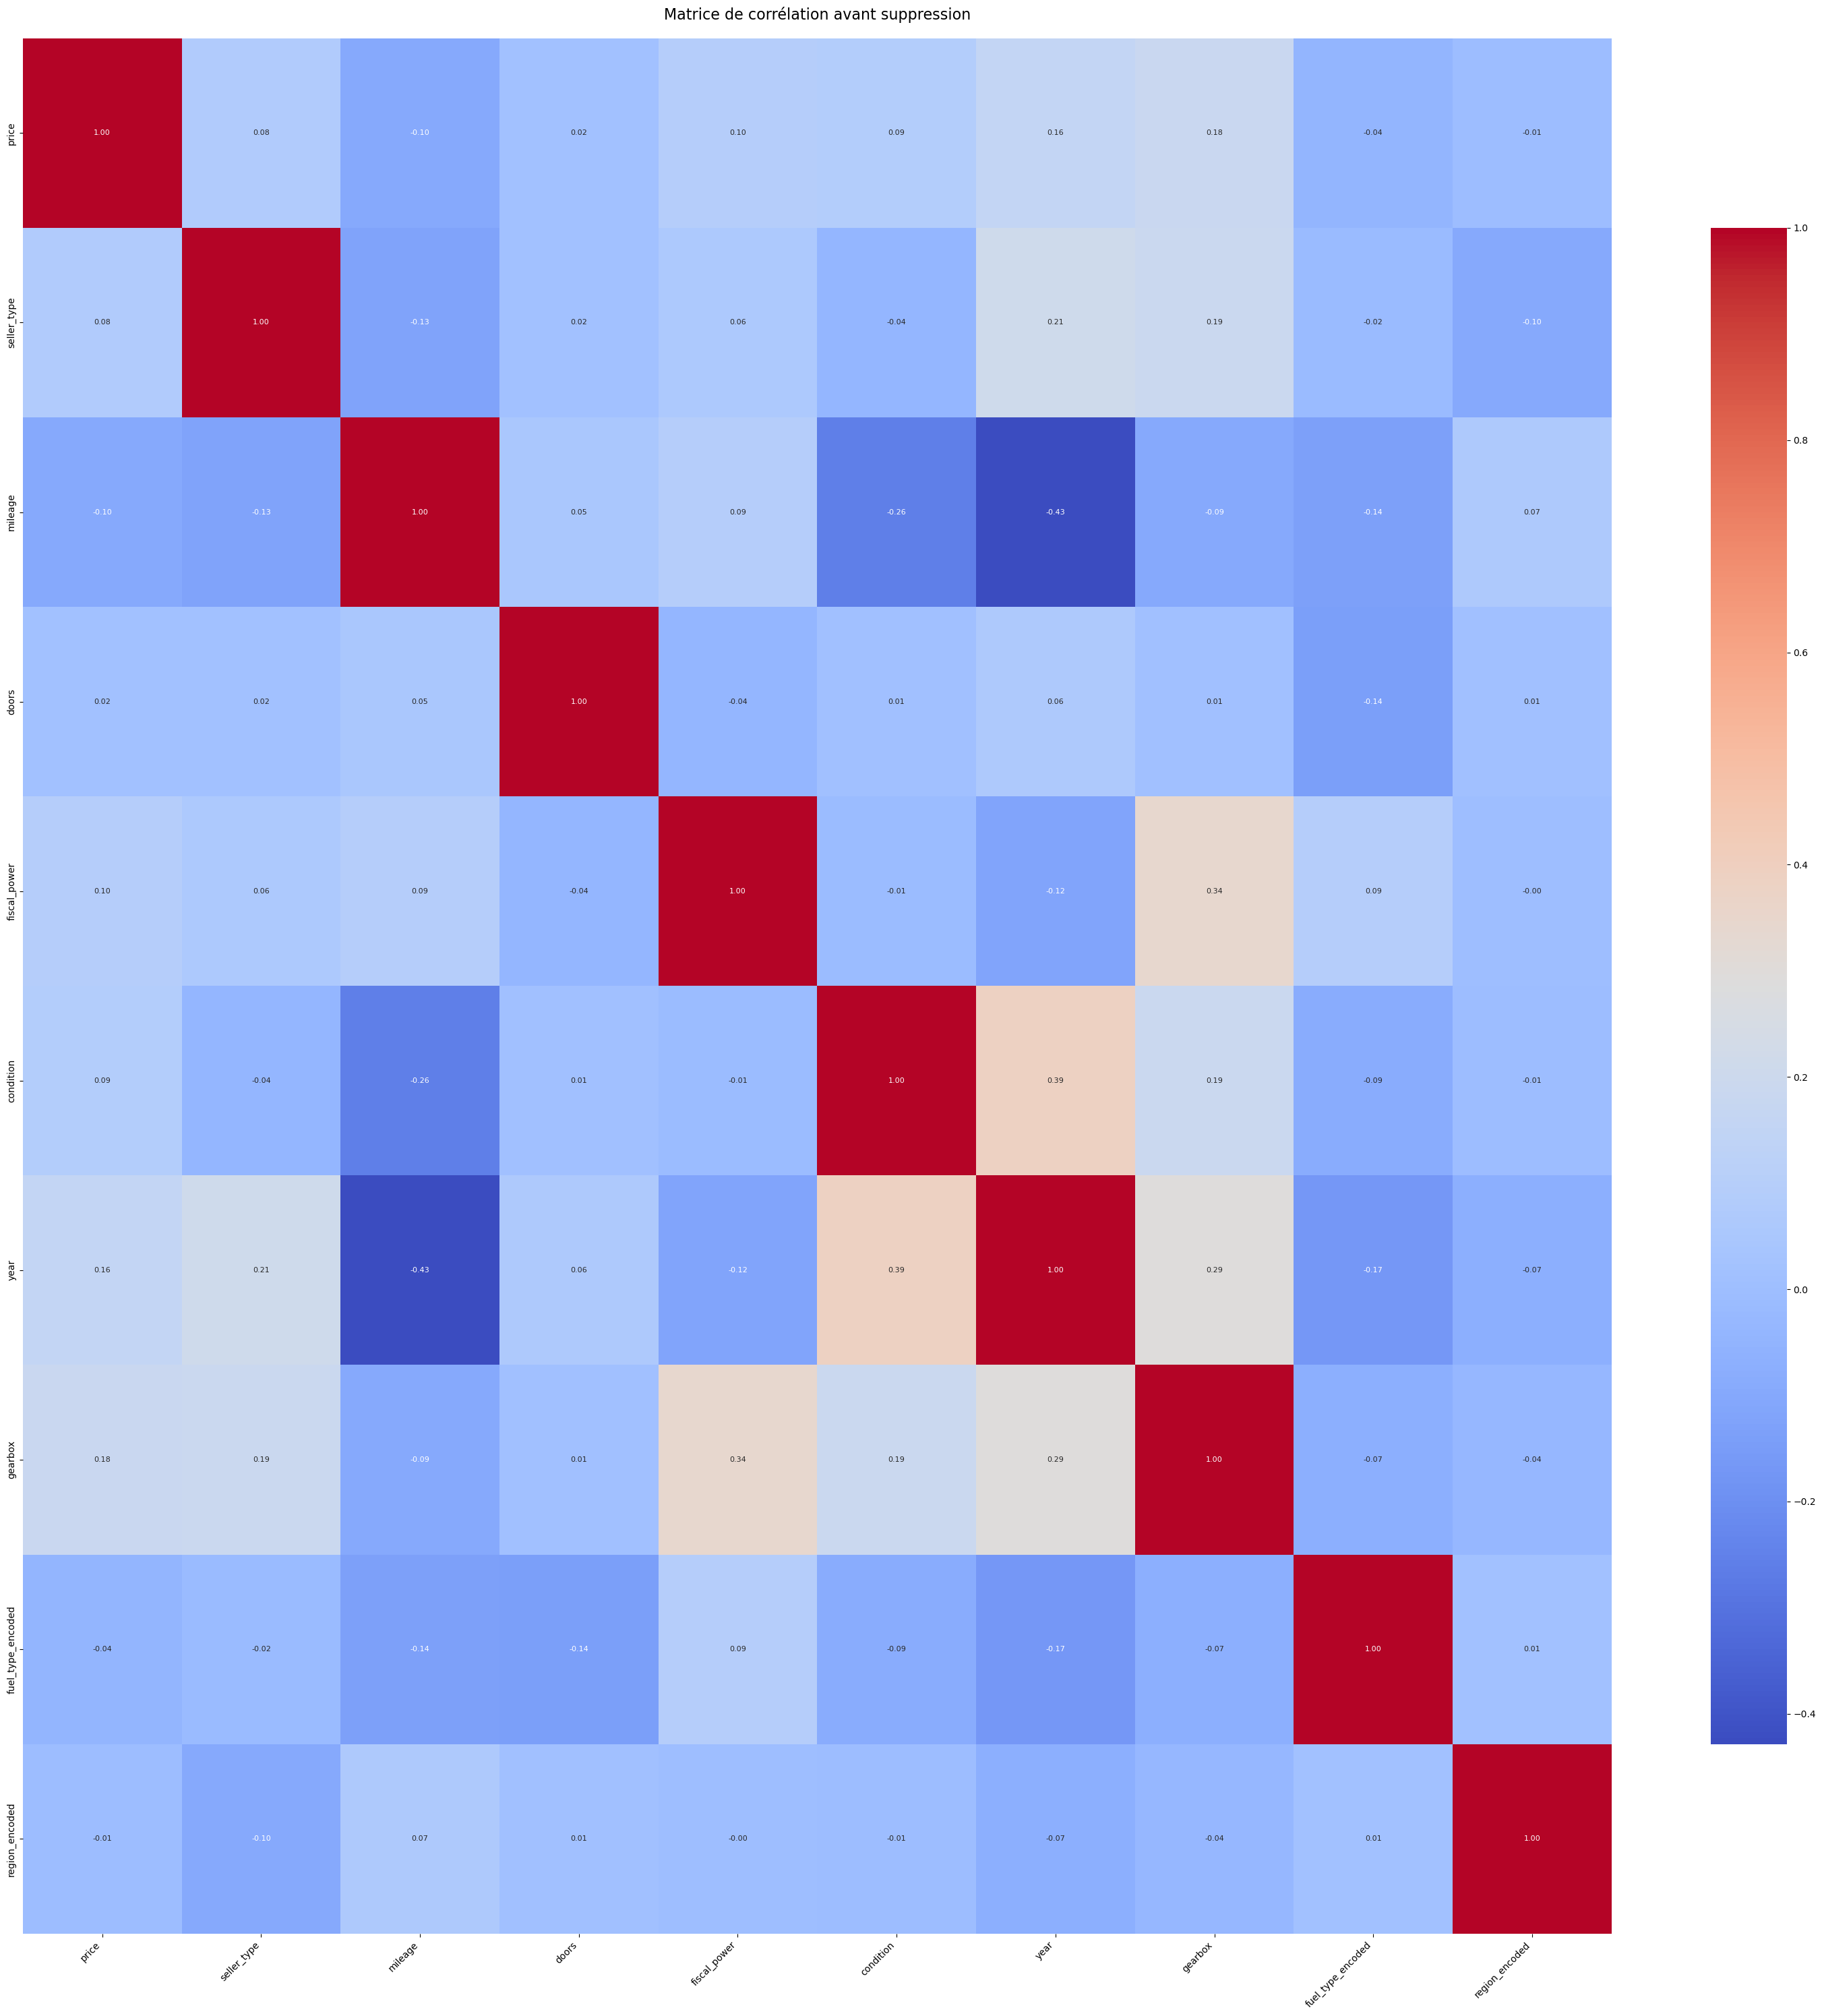

In [98]:
df_numeric = df.select_dtypes(include=['number'])

# 1. Calculer la matrice de corrélation
corr_matrix = df_numeric.corr()

# 2. Visualisation (adaptée aux grandes matrices)
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            annot_kws={'size': 8}, cbar_kws={'shrink': 0.8})
plt.title('Matrice de corrélation avant suppression', pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [115]:
df.head()

,price,seller_type,mileage,brand,model,doors,origin,fiscal_power,condition,year,gearbox,fuel_type_encoded,region_encoded
1,365000.0,1,144999.5,Volkswagen,Touareg,5.0,NaN,12.0,4.0,2021,1.0,0,1
2,198000.0,1,2499.5,Opel,Corsa,5.0,WW au Maroc,6.0,5.0,2024,0.0,0,1
3,79000.0,1,174999.5,Renault,Megane,3.0,WW au Maroc,7.0,3.0,2009,0.0,0,1
4,93000.0,1,77499.5,Fiat,500,5.0,WW au Maroc,6.0,4.0,2017,0.0,0,1
5,340000.0,1,104999.5,Mercedes-Benz,Classe GLC,5.0,NaN,9.0,4.0,2018,1.0,0,1


In [99]:
df.to_excel("df_pretraiter2.xlsx", index=False)

## Entrainement de modéle

In [100]:
# pd.set_option('display.max_columns', None)
# df.head()

In [101]:
# #head_element()
# # Colonnes à analyser
# cols = ['gearbox', 'year', 'condition', 'fiscal_power', 'doors', 'mileage', 'price']

# # Création d'une figure avec plusieurs sous-graphes
# plt.figure(figsize=(18, 12))

# for i, col in enumerate(cols, 1):
#     plt.subplot(3, 4, i)
#     sns.boxplot(x=df[col])
#     plt.title(f'Boxplot de {col}')
#     plt.tight_layout()

# plt.show()

In [102]:
# df['year'] = df['year'].astype(float)
# def replace_outliers_with_mean(df, col):
#     # Calcul des quartiles et IQR
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Calcul de la moyenne sans les outliers
#     mean_val = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound), col].mean()
    
#     # Remplacement des outliers par la moyenne
#     df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = mean_val
    
#     return df

# # Colonnes numériques à traiter
# numeric_cols = ['gearbox', 'year', 'condition', 'fiscal_power', 'doors', 'mileage', 'price']

# for col in numeric_cols:
#     df = replace_outliers_with_mean(df, col)

# # Vérification
# print(df[numeric_cols].describe())

In [103]:
# #head_element()
# # Colonnes à analyser
# cols = ['gearbox', 'year', 'condition', 'fiscal_power', 'doors', 'mileage', 'price']

# # Création d'une figure avec plusieurs sous-graphes
# plt.figure(figsize=(18, 12))

# for i, col in enumerate(cols, 1):
#     plt.subplot(3, 4, i)
#     sns.boxplot(x=df[col])
#     plt.title(f'Boxplot de {col}')
#     plt.tight_layout()

# plt.show()

In [104]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from scipy.stats import randint

# # --- 1. Séparation features / target ---
# X = df.drop('price', axis=1)
# y = df['price']

# # --- 2. Transformation logarithmique de la cible ---
# y = np.log1p(y)  # log(1 + y) pour gérer les zéros

# # --- 3. Split train/test ---
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42
# )

# # --- 4. Calcul des modes nécessaires pour l’imputation ---
# mode_origin_per_model = X_train.groupby('model')['origin'].agg(
#     lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
# )
# mode_origin_per_brand = X_train.groupby('brand')['origin'].agg(
#     lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
# )
# global_mode_origin = X_train['origin'].mode().iloc[0]

# # --- 5. Imputation vectorisée pour 'origin' ---
# def impute_origin(df):
#     df = df.copy()
#     df['origin'] = df['origin'].fillna(df['model'].map(mode_origin_per_model))
#     df['origin'] = df['origin'].fillna(df['brand'].map(mode_origin_per_brand))
#     df['origin'] = df['origin'].fillna(global_mode_origin)
#     return df

# X_train = impute_origin(X_train)
# X_test = impute_origin(X_test)

# # --- 6. Calcul des modes pour 'brand' et 'model' par 'origin' ---
# mode_brand_per_origin = X_train.groupby('origin')['brand'].agg(
#     lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
# )
# mode_model_per_origin = X_train.groupby('origin')['model'].agg(
#     lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
# )
# global_mode_brand = X_train['brand'].mode().iloc[0]
# global_mode_model = X_train['model'].mode().iloc[0]

# # --- 7. Imputation vectorisée pour 'brand' et 'model' ---
# def impute_brand(df):
#     df = df.copy()
#     df['brand'] = df['brand'].fillna(df['origin'].map(mode_brand_per_origin))
#     df['brand'] = df['brand'].fillna(global_mode_brand)
#     return df

# def impute_model(df):
#     df = df.copy()
#     df['model'] = df['model'].fillna(df['origin'].map(mode_model_per_origin))
#     df['model'] = df['model'].fillna(global_mode_model)
#     return df

# X_train = impute_brand(X_train)
# X_train = impute_model(X_train)
# X_test = impute_brand(X_test)
# X_test = impute_model(X_test)

In [105]:
# # --- 8. Target encoding avec lissage ---
# def target_encode_smooth(train_df, test_df, target_col, cat_col, m=10):
#     global_mean = train_df[target_col].mean()
#     agg = train_df.groupby(cat_col)[target_col].agg(['mean', 'count'])
#     smooth = (agg['count'] * agg['mean'] + m * global_mean) / (agg['count'] + m)
#     train_encoded = train_df[cat_col].map(smooth)
#     test_encoded = test_df[cat_col].map(smooth).fillna(global_mean)
#     return train_encoded, test_encoded

# train_with_target = pd.concat([X_train, y_train], axis=1)

# for col in ['brand', 'model', 'origin']:
#     X_train[col + '_enc'], X_test[col + '_enc'] = target_encode_smooth(
#         train_with_target, X_test, target_col='price', cat_col=col, m=10
#     )

# X_train = X_train.drop(['brand', 'model', 'origin'], axis=1)
# X_test = X_test.drop(['brand', 'model', 'origin'], axis=1)


In [106]:
# # --- 9. Standardisation ---
# #pour toute les données
# num_cols = ['mileage', 'fiscal_power', 'year', 'doors']
# scaler = StandardScaler()
# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# X_test[num_cols] = scaler.transform(X_test[num_cols])


In [107]:
# # --- 10. Recherche aléatoire d’hyperparamètres ---
# param_dist = {
#     'n_estimators': randint(100, 500),
#     'max_depth': randint(5, 30),
#     'min_samples_leaf': randint(1, 10),
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# rf = RandomForestRegressor(random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=50,
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,
#     random_state=42,
#     verbose=1
# )

# random_search.fit(X_train, y_train)

# print("Meilleurs paramètres :", random_search.best_params_)
# print("Meilleur score (MSE négatif) :", random_search.best_score_)

# best_rf = random_search.best_estimator_

In [108]:
# # --- 11. Validation croisée sur le meilleur modèle ---
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(
#     best_rf,
#     X_train,
#     y_train,
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1
# )

# mse_scores = -cv_scores
# rmse_scores = np.sqrt(mse_scores)
# print(f"Validation croisée 5-fold RMSE du meilleur modèle : {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")

In [109]:
# # --- 12. Prédictions ---
# y_train_pred = best_rf.predict(X_train)
# y_test_pred = best_rf.predict(X_test)

# # --- 13. Évaluation ---
# def print_metrics(y_true, y_pred, dataset_name="Dataset"):
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     mae = mean_absolute_error(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)
#     print(f"Performance sur {dataset_name} :")
#     print(f"  MSE = {mse:.4f}")
#     print(f"  RMSE = {rmse:.4f}")
#     print(f"  MAE = {mae:.4f}")
#     print(f"  R2 = {r2:.4f}\n")

# print_metrics(y_train, y_train_pred, "Train")
# print_metrics(y_test, y_test_pred, "Test")

In [110]:
# import shap

# # --- SHAP Global Feature Importance ---
# explainer = shap.TreeExplainer(best_rf)
# shap_values = explainer.shap_values(X_test)

# # Visualisation globale
# shap.summary_plot(shap_values, X_test, feature_names=X_train.columns, plot_type="bar")

# # Visualisation détaillée (beeswarm plot)
# shap.summary_plot(shap_values, X_test, feature_names=X_train.columns)

# # --- Explication locale pour une prédiction spécifique ---
# idx = 0  # Index de l'observation à expliquer
# shap.force_plot(
#     explainer.expected_value, 
#     shap_values[idx], 
#     X_test.iloc[idx], 
#     feature_names=X_train.columns,
#     matplotlib=True
# )


In [111]:
# from lime.lime_tabular import LimeTabularExplainer

# # Création de l'explainer LIME
# explainer_lime = LimeTabularExplainer(
#     training_data=X_train.values,
#     feature_names=X_train.columns.tolist(),
#     class_names=['price'],
#     mode='regression',
#     discretize_continuous=False,
#     verbose=True
# )

# # Explication pour une observation spécifique
# idx = 0  # Même index que pour SHAP
# exp = explainer_lime.explain_instance(
#     X_test.iloc[idx].values, 
#     best_rf.predict, 
#     num_features=5
# )

# # Affichage des résultats
# exp.show_in_notebook(show_table=True)

# # Export vers un fichier HTML
# exp.save_to_file('lime_explanation.html')


In [112]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from scipy.stats import randint

# # --- 1. Séparation features / target ---
# X = df.drop('price', axis=1)
# y = df['price']

# # --- 2. Transformation logarithmique de la cible ---
# y = np.log1p(y)  # log(1 + y) pour gérer les zéros

# # --- 3. Split train/test ---
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42
# )

# # --- 4. Calcul des modes nécessaires pour l’imputation ---
# mode_origin_per_model = X_train.groupby('model')['origin'].agg(
#     lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
# )
# mode_origin_per_brand = X_train.groupby('brand')['origin'].agg(
#     lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
# )
# global_mode_origin = X_train['origin'].mode().iloc[0]

# # --- 5. Imputation vectorisée pour 'origin' ---
# def impute_origin(df):
#     df = df.copy()
#     df['origin'] = df['origin'].fillna(df['model'].map(mode_origin_per_model))
#     df['origin'] = df['origin'].fillna(df['brand'].map(mode_origin_per_brand))
#     df['origin'] = df['origin'].fillna(global_mode_origin)
#     return df

# X_train = impute_origin(X_train)
# X_test = impute_origin(X_test)

# # --- 6. Calcul des modes pour 'brand' et 'model' par 'origin' ---
# mode_brand_per_origin = X_train.groupby('origin')['brand'].agg(
#     lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
# )
# mode_model_per_origin = X_train.groupby('origin')['model'].agg(
#     lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
# )
# global_mode_brand = X_train['brand'].mode().iloc[0]
# global_mode_model = X_train['model'].mode().iloc[0]

# # --- 7. Imputation vectorisée pour 'brand' et 'model' ---
# def impute_brand(df):
#     df = df.copy()
#     df['brand'] = df['brand'].fillna(df['origin'].map(mode_brand_per_origin))
#     df['brand'] = df['brand'].fillna(global_mode_brand)
#     return df

# def impute_model(df):
#     df = df.copy()
#     df['model'] = df['model'].fillna(df['origin'].map(mode_model_per_origin))
#     df['model'] = df['model'].fillna(global_mode_model)
#     return df

# X_train = impute_brand(X_train)
# X_train = impute_model(X_train)
# X_test = impute_brand(X_test)
# X_test = impute_model(X_test)

# # --- 8. Target encoding avec lissage ---
# def target_encode_smooth(train_df, test_df, target_col, cat_col, m=10):
#     global_mean = train_df[target_col].mean()
#     agg = train_df.groupby(cat_col)[target_col].agg(['mean', 'count'])
#     smooth = (agg['count'] * agg['mean'] + m * global_mean) / (agg['count'] + m)
#     train_encoded = train_df[cat_col].map(smooth)
#     test_encoded = test_df[cat_col].map(smooth).fillna(global_mean)
#     return train_encoded, test_encoded

# train_with_target = pd.concat([X_train, y_train], axis=1)

# for col in ['brand', 'model', 'origin']:
#     X_train[col + '_enc'], X_test[col + '_enc'] = target_encode_smooth(
#         train_with_target, X_test, target_col='price', cat_col=col, m=10
#     )

# X_train = X_train.drop(["model","origin","brand","seller_type","doors","region_Tanger-Tétouan-Al Hoceima","region_Rabat-Salé-Kénitra","region_Souss-Massa","region_Laâyoune-Sakia El Hamra","region_Marrakech-Safi",
# "region_Guelmim-Oued Noun","region_L'Oriental","region_Dakhla-Oued Ed-Dahab","region_Drâa-Tafilalet","region_Fès-Meknès" ,"region_Béni Mellal-Khénifra","region_Casablanca-Settat"], axis=1)
# X_test = X_test.drop(["model","origin","brand","seller_type","doors","region_Tanger-Tétouan-Al Hoceima","region_Rabat-Salé-Kénitra","region_Souss-Massa","region_Laâyoune-Sakia El Hamra","region_Marrakech-Safi",
# "region_Guelmim-Oued Noun","region_L'Oriental","region_Dakhla-Oued Ed-Dahab","region_Drâa-Tafilalet","region_Fès-Meknès" ,"region_Béni Mellal-Khénifra","region_Casablanca-Settat"], axis=1)
# # --- 9. Standardisation ---
# num_cols = ['mileage', 'fiscal_power', 'year']
# scaler = StandardScaler()
# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# X_test[num_cols] = scaler.transform(X_test[num_cols])

# # --- 10. Recherche aléatoire d’hyperparamètres ---
# param_dist = {
#     'n_estimators': randint(100, 500),
#     'max_depth': randint(5, 30),
#     'min_samples_leaf': randint(1, 10),
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# rf = RandomForestRegressor(random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=50,
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,
#     random_state=42,
#     verbose=1
# )

# random_search.fit(X_train, y_train)

# print("Meilleurs paramètres :", random_search.best_params_)
# print("Meilleur score (MSE négatif) :", random_search.best_score_)

# best_rf = random_search.best_estimator_

# # --- 11. Validation croisée sur le meilleur modèle ---
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(
#     best_rf,
#     X_train,
#     y_train,
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1
# )

# mse_scores = -cv_scores
# rmse_scores = np.sqrt(mse_scores)
# print(f"Validation croisée 5-fold RMSE du meilleur modèle : {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")

# # --- 12. Prédictions ---
# y_train_pred = best_rf.predict(X_train)
# y_test_pred = best_rf.predict(X_test)

# # --- 13. Évaluation ---
# def print_metrics(y_true, y_pred, dataset_name="Dataset"):
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     mae = mean_absolute_error(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)
#     print(f"Performance sur {dataset_name} :")
#     print(f"  MSE = {mse:.4f}")
#     print(f"  RMSE = {rmse:.4f}")
#     print(f"  MAE = {mae:.4f}")
#     print(f"  R2 = {r2:.4f}\n")

# print_metrics(y_train, y_train_pred, "Train")
# print_metrics(y_test, y_test_pred, "Test")


In [113]:
# from sklearn.ensemble import HistGradientBoostingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Supposons que X_train, X_test, y_train, y_test sont déjà préparés comme dans votre pipeline
# print(X_train)
# def print_metrics(y_true, y_pred, model_name="Model"):
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     mae = mean_absolute_error(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)
#     print(f"Performance de {model_name} :")
#     print(f"  MSE = {mse:.4f}")
#     print(f"  RMSE = {rmse:.4f}")
#     print(f"  MAE = {mae:.4f}")
#     print(f"  R2 = {r2:.4f}\n")

# # 1. HistGradientBoostingRegressor (sklearn)
# hgb = HistGradientBoostingRegressor(max_iter=200, max_depth=25, random_state=42)
# hgb.fit(X_train, y_train)
# y_train_pred = hgb.predict(X_train)
# y_test_pred = hgb.predict(X_test)
# print_metrics(y_train, y_train_pred, "HistGradientBoostingRegressor (sklearn)")
# print_metrics(y_test, y_test_pred, "HistGradientBoostingRegressor (sklearn)")

# # 2. XGBoost
# xgb = XGBRegressor(
#     n_estimators=200,
#     max_depth=25,
#     learning_rate=0.1,
#     random_state=42,
#     verbosity=0,
#     tree_method='hist'  # accélère l'entraînement
# )
# xgb.fit(X_train, y_train)
# y_train_pred = xgb.predict(X_train)
# y_test_pred = xgb.predict(X_test)
# print_metrics(y_train, y_train_pred, "XGBoost")
# print_metrics(y_test, y_test_pred, "XGBoost")

# # 3. LightGBM
# lgbm = LGBMRegressor(
#     n_estimators=200,
#     max_depth=25,
#     learning_rate=0.1,
#     random_state=42,
#     n_jobs=-1
# )
# lgbm.fit(X_train, y_train)
# y_train_pred = lgbm.predict(X_train)
# y_test_pred = lgbm.predict(X_test)
# print_metrics(y_train, y_train_pred, "LightGBM")
# print_metrics(y_test, y_test_pred, "LightGBM")

# # 4. CatBoost
# cat = CatBoostRegressor(
#     iterations=200,
#     depth=8,  # CatBoost recommande souvent des profondeurs plus faibles
#     learning_rate=0.1,
#     random_seed=42,
#     verbose=False
# )
# cat.fit(X_train, y_train)
# y_train_pred = cat.predict(X_train)
# y_test_pred = cat.predict(X_test)
# print_metrics(y_train, y_train_pred, "CatBoost")
# print_metrics(y_test, y_test_pred, "CatBoost")
# # --- Nouvelles données pour la prédiction ---
# # new_data = {
# #     'mileage': [120000, 80000, 50000],
# #     'fiscal_power': [7, 6, 8],
# #     'year': [2010, 2015, 2018],
# #     'gearbox': [0, 1, 0],  # 0 pour manuel, 1 pour automatique
# #     'fuel_essence': [1, 0, 1],  # 1 si essence, 0 sinon
# #     'model_enc': [10.5, 12.2, 11.8],  # Valeurs encodées
# #     'brand_enc': [9.8, 11.5, 10.2]   # Valeurs encodées
# # }
# # new_df = pd.DataFrame(new_data)

# # # Assurez-vous que les colonnes de new_df correspondent à celles de X_train
# # missing_cols = set(X_train.columns) - set(new_df.columns)
# # for c in missing_cols:
# #     new_df[c] = 0  # ou toute autre valeur par défaut appropriée
# # # Assurez-vous de conserver uniquement les colonnes utilisées pour l'entraînement
# # new_df = new_df[X_train.columns]

# # # Standardisation des nouvelles données
# # new_df[num_cols] = scaler.transform(new_df[num_cols])

# # # Faire les prédictions
# # predicted_prices_log = cat.predict(new_df)
# # predicted_prices = np.expm1(predicted_prices_log)

# # print("Prédictions des prix :")
# # print(predicted_prices)

In [114]:
# # 1. Définis toutes les colonnes nécessaires (basées sur X_train)
# all_cols = ['mileage', 'fiscal_power', 'condition', 'year', 'gearbox', 
#             'fuel_diesel', 'fuel_electrique', 'fuel_essence', 'fuel_hybride', 'fuel_lpg', 
#             'brand_enc', 'model_enc', 'origin_enc']

# # 2. Fonction pour prédire le prix d'une voiture
# def predire_prix(modele, infos_voiture):
#     """
#     Prédit le prix d'une voiture à partir des informations saisies.
#     """
#     # 3. Ajoute les colonnes manquantes à infos_voiture avec des valeurs par défaut
#     for col in all_cols:
#         if col not in infos_voiture:
#             infos_voiture[col] = 0  # Valeur par défaut (0 pour les colonnes binaires)
    
#     # 4. Transformation des infos en DataFrame
#     new_df = pd.DataFrame([infos_voiture])
    
#     # 5. Réordonne les colonnes pour correspondre à X_train
#     new_df = new_df[all_cols]
    
#     # 6. Standardisation (num_cols = ['mileage', 'fiscal_power', 'year'])
#     new_df[num_cols] = scaler.transform(new_df[num_cols])
    
#     # 7. Prédiction
#     prix_log = modele.predict(new_df)[0]
#     prix = np.expm1(prix_log)  # Exponentielle inverse
    
#     return prix

# # 8. Exemple d'utilisation
# infos_voiture = {
#     'mileage': 120000,
#     'fiscal_power': 7,
#     'condition': 4,  # Ajout de la condition
#     'year': 2010,
#     'gearbox': 0,  # 0 pour manuel, 1 pour automatique
#     'fuel_essence': 1,  # 1 si essence, 0 sinon
#     'fuel_diesel': 0,   # Ajout et mise à 0
#     'fuel_electrique': 0, # Ajout et mise à 0
#     'fuel_hybride': 0,  # Ajout et mise à 0
#     'fuel_lpg': 0,      # Ajout et mise à 0
#     'model_enc': 10.5,  # Valeurs encodées (si tu utilises l'encodage)
#     'brand_enc': 9.8,
#     'origin_enc': 11.2  # Exemple, adapte selon ton encodage
# }

# # 9. Prédiction avec les différents modèles
# prix_rf = predire_prix(best_rf, infos_voiture)
# prix_hgb = predire_prix(hgb, infos_voiture)
# prix_xgb = predire_prix(xgb, infos_voiture)
# prix_lgbm = predire_prix(lgbm, infos_voiture)
# prix_cat = predire_prix(cat, infos_voiture)

# # 10. Affichage des résultats
# print("Prédictions des prix :")
# print(f"  RandomForest: {prix_rf:.2f}")
# print(f"  HistGradientBoosting: {prix_hgb:.2f}")
# print(f"  XGBoost: {prix_xgb:.2f}")
# print(f"  LightGBM: {prix_lgbm:.2f}")
# print(f"  CatBoost: {prix_cat:.2f}")